In [12]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

## Reading the data

In [13]:
#load dataset
data= pd.read_csv("telescope_data/telescope_data.csv")
# print(data.columns.tolist())
data.drop(columns=['Unnamed: 0'], inplace=True)
print(data.head())

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  


## Plotting the data histogram

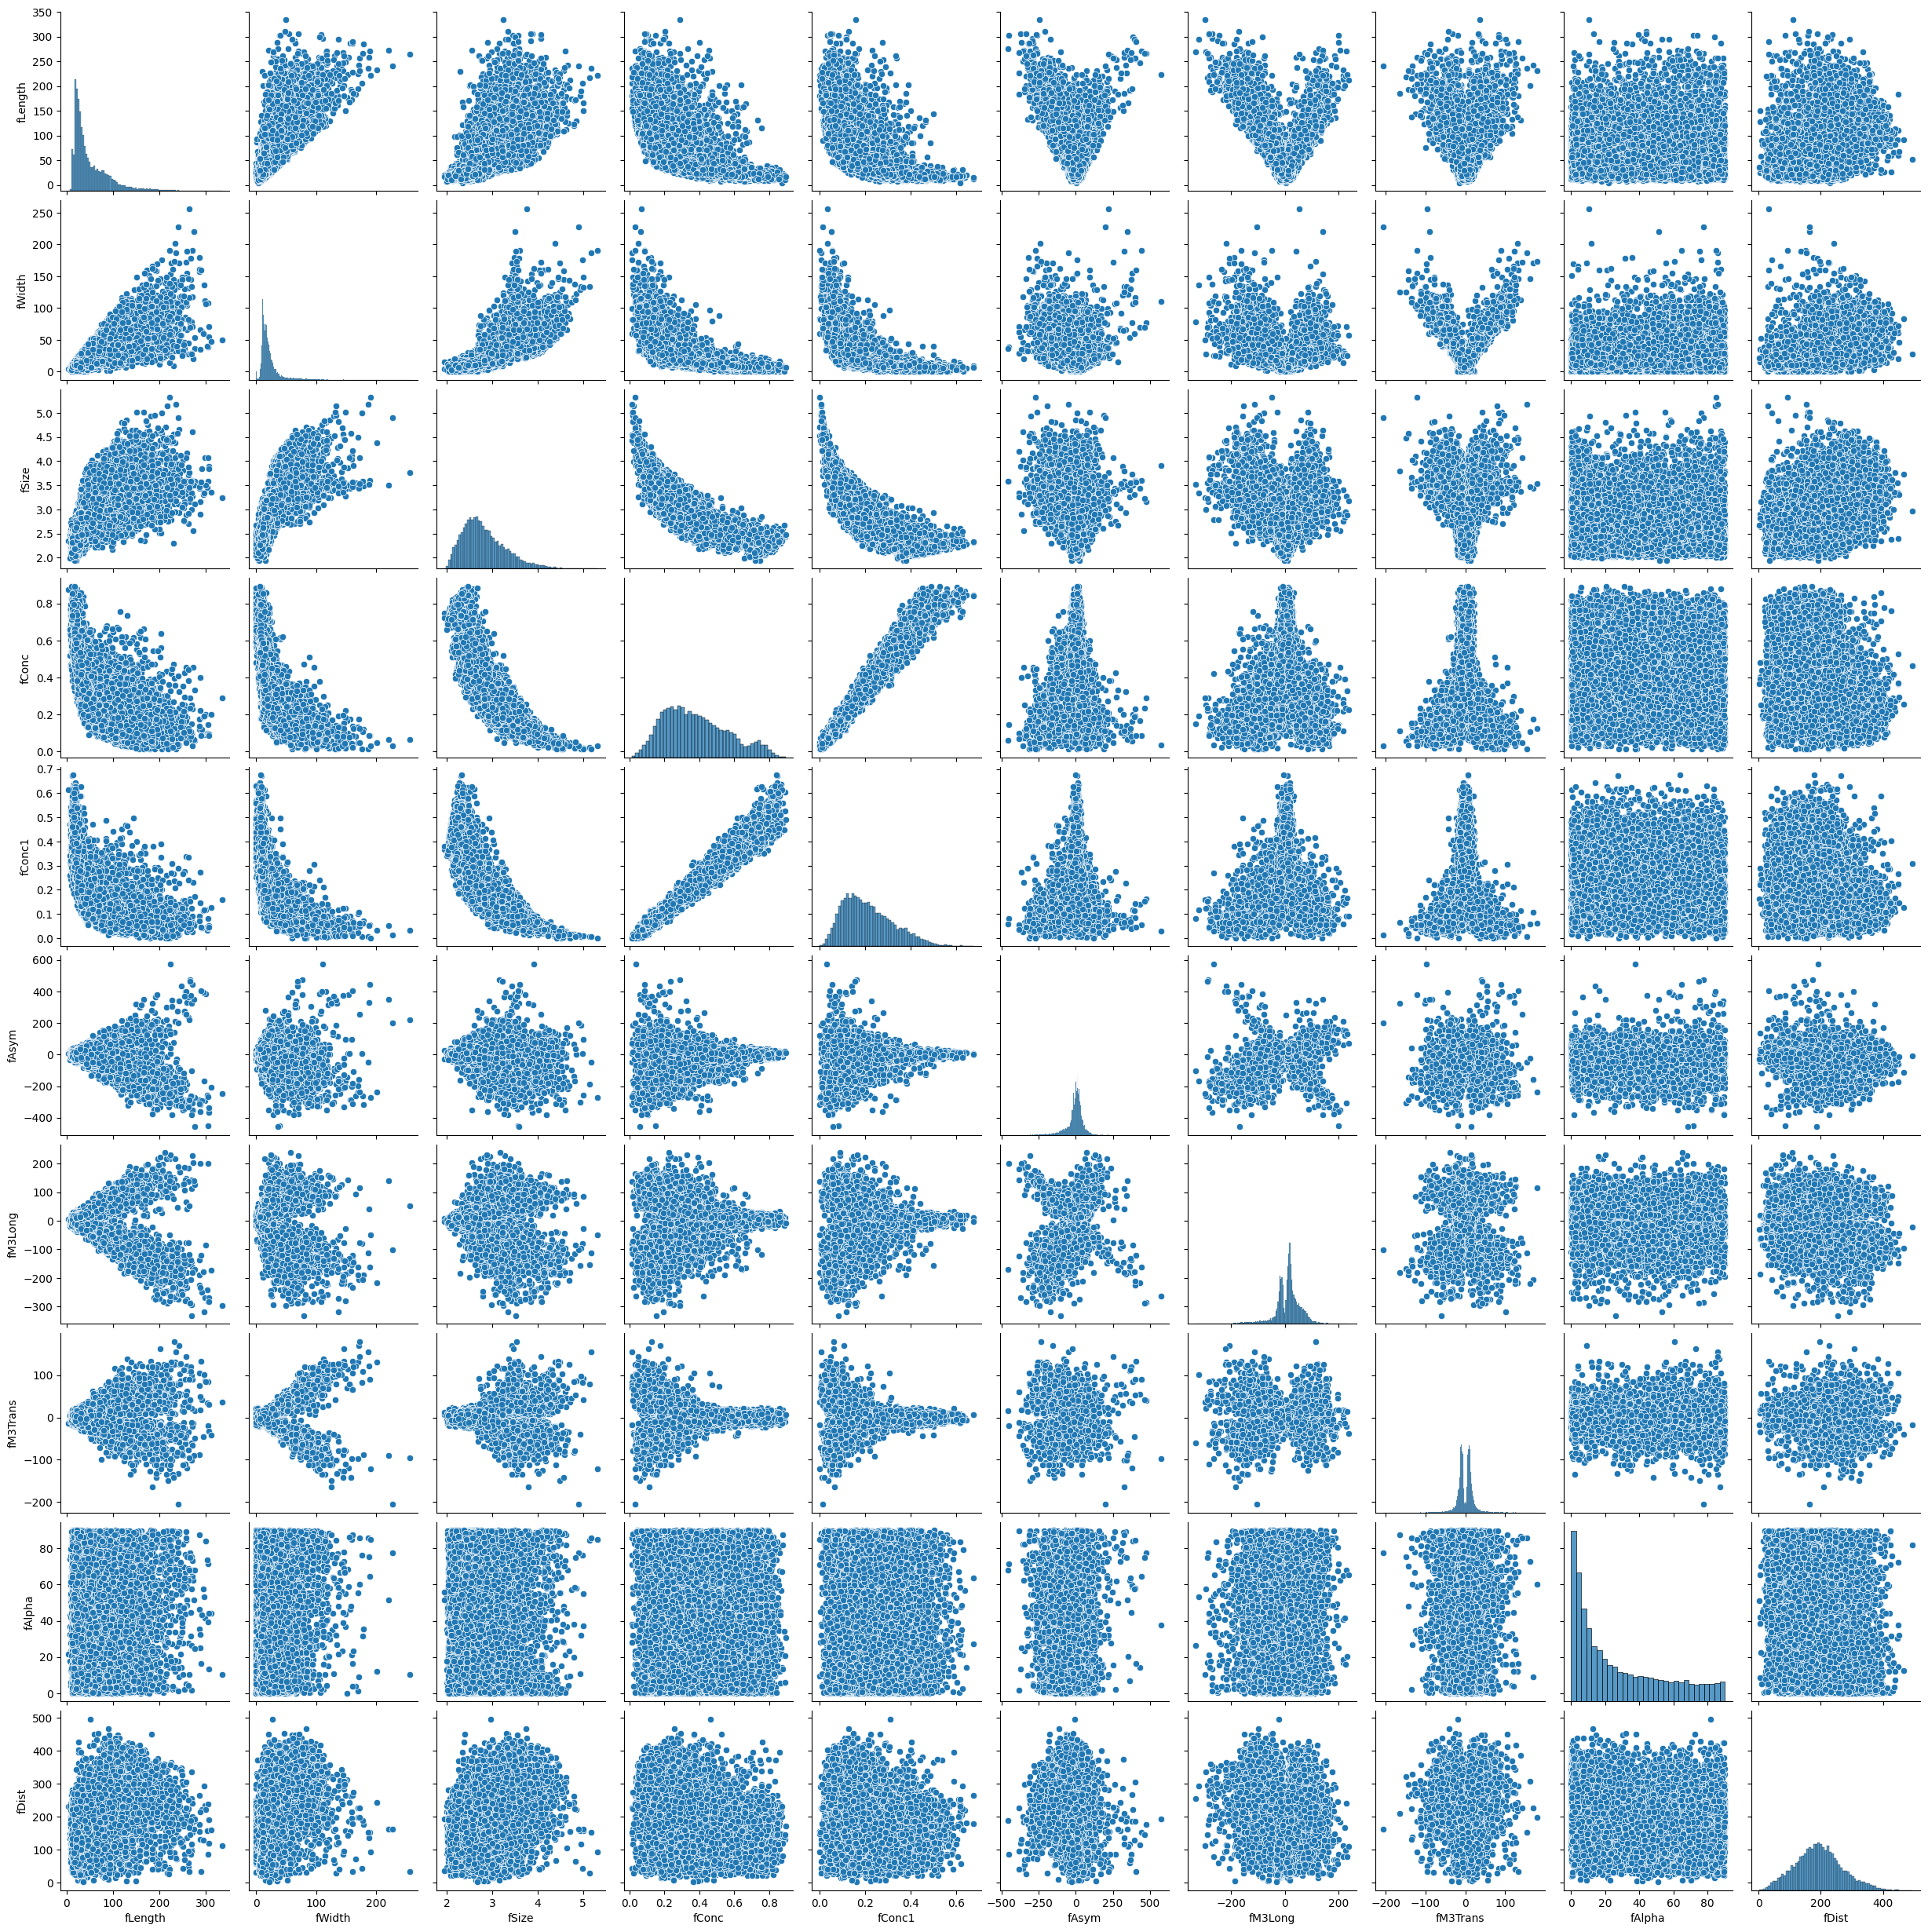

In [14]:
df = data.copy()
sns.pairplot(data=df)

## Balancing the data 

- Balancing types into equal samples 

In [15]:
gamma = data[data['class'] == 'g']
hadron = data[data['class'] == 'h']
#balance 2 types into equal samples
n_samples = min(len(gamma), len(hadron))
gamma_balanced = gamma.sample(n_samples, random_state=42) # random to use same samples every run
hadron_balanced = hadron.sample(n_samples, random_state=42)
data_balanced = pd.concat([gamma_balanced, hadron_balanced]).sample(frac=1, random_state=42)



## Splitting the data

In [16]:
X = data_balanced.drop('class', axis=1)# features of data
y = data_balanced['class'].map({'g': 1, 'h': 0})# type of data
#split data into 70% train 15% validation 15% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(y_train.value_counts())
print(y_valid.value_counts())
print(f"Train: {len(X_train)}, Validation: {len(X_valid)}, Test: {len(X_test)}")


1    4712
0    4651
Name: class, dtype: int64
0    1004
1    1002
Name: class, dtype: int64
Train: 9363, Validation: 2006, Test: 2007


## Preparing the data

- Scaling (x) features to ensure all features are on a similar scale

In [17]:
#scaling to make features equal
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)


## KNN Classification Manually

- Calculate euclidean_distance

In [18]:
# without using scikit_learn
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
def predict_manual_knn(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, x) for x in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest = [y_train.iloc[i] for i in k_indices]
        label = max(set(k_nearest), key=k_nearest.count)
        predictions.append(label)
    return np.array(predictions)

## KNN classification using Scikit & Confusion Matrices

- Loop according to k values
- Confusion matrix for both cases (manual - scikit)
- Evaluating trained model’s accuracy, precision, recall, f-score  


Manual KNN (k=1) Validation Results:
Accuracy: 0.7841
Precision: 0.7612
Recall: 0.8273
F1 Score: 0.7929

Confusion Matrix:
 [[744 260]
 [173 829]]


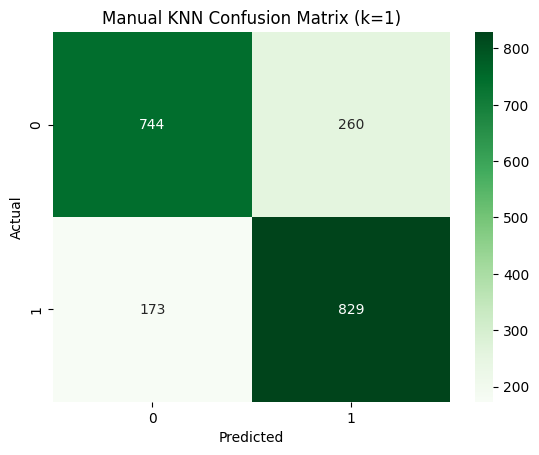


Sklearn KNN (k=1) Validation Accuracy: 0.784147557328016
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1004
           1       0.76      0.83      0.79      1002

    accuracy                           0.78      2006
   macro avg       0.79      0.78      0.78      2006
weighted avg       0.79      0.78      0.78      2006



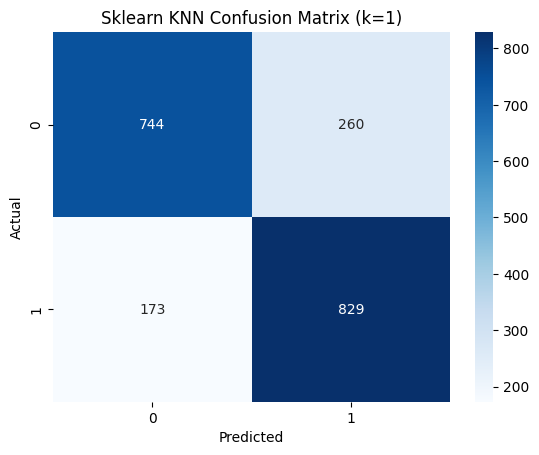


Manual KNN (k=3) Validation Results:
Accuracy: 0.8021
Precision: 0.7661
Recall: 0.8693
F1 Score: 0.8144

Confusion Matrix:
 [[738 266]
 [131 871]]


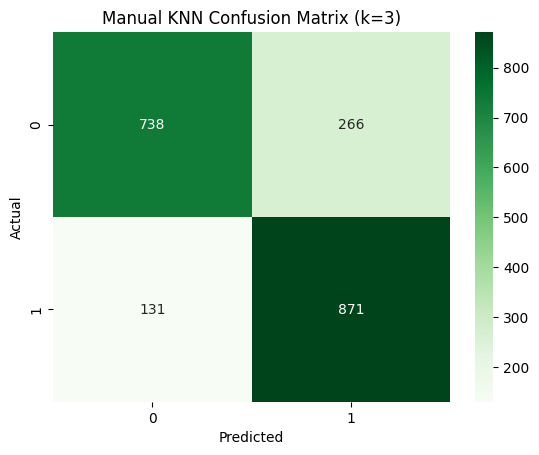


Sklearn KNN (k=3) Validation Accuracy: 0.8020937188434696
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1004
           1       0.77      0.87      0.81      1002

    accuracy                           0.80      2006
   macro avg       0.81      0.80      0.80      2006
weighted avg       0.81      0.80      0.80      2006



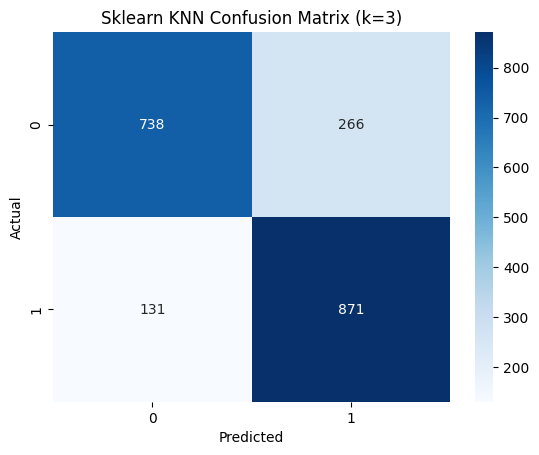


Manual KNN (k=7) Validation Results:
Accuracy: 0.8131
Precision: 0.7738
Recall: 0.8842
F1 Score: 0.8253

Confusion Matrix:
 [[745 259]
 [116 886]]


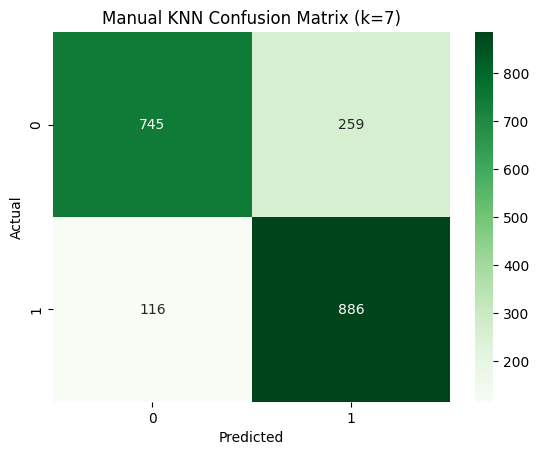


Sklearn KNN (k=7) Validation Accuracy: 0.8130608175473579
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1004
           1       0.77      0.88      0.83      1002

    accuracy                           0.81      2006
   macro avg       0.82      0.81      0.81      2006
weighted avg       0.82      0.81      0.81      2006



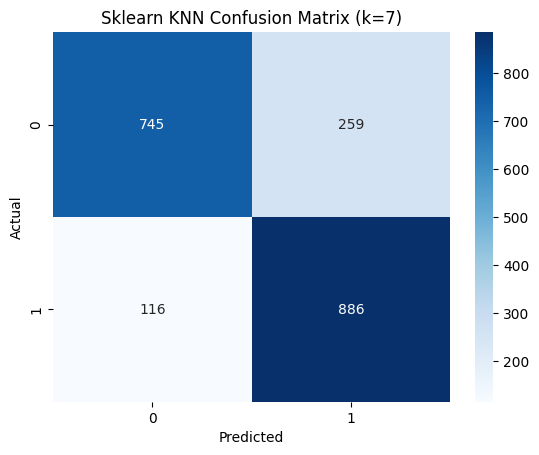

KeyboardInterrupt: 

In [19]:
k_values = [1, 3, 7, 11,15 ]
manual_accuracies = []
sklearn_accuracies = []

for k in k_values:
    y_pred_manual = predict_manual_knn(X_train_scaled, y_train, X_valid_scaled, k)
    
    print(f"\nManual KNN (k={k}) Validation Results:")
    print("Accuracy:", round(accuracy_score(y_valid, y_pred_manual), 4))
    print("Precision:", round(precision_score(y_valid, y_pred_manual), 4))
    print("Recall:", round(recall_score(y_valid, y_pred_manual), 4))
    print("F1 Score:", round(f1_score(y_valid, y_pred_manual), 4))
    
    cm = confusion_matrix(y_valid, y_pred_manual)
    print("\nConfusion Matrix:\n", cm)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f"Manual KNN Confusion Matrix (k={k})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    # Using scikit_learn
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)  
    y_pred = knn_model.predict(X_valid_scaled)  

    print(f"\nSklearn KNN (k={k}) Validation Accuracy:", accuracy_score(y_valid, y_pred))
    print(classification_report(y_valid, y_pred))

    cm = confusion_matrix(y_valid, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Sklearn KNN Confusion Matrix (k={k})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    manual_accuracies.append(accuracy_score(y_valid, y_pred_manual))
    sklearn_accuracies.append(accuracy_score(y_valid, y_pred))

### Evaluating best k-value

In [ ]:
best_k_manual = k_values[np.argmax(manual_accuracies)]
best_k_sklearn = k_values[np.argmax(sklearn_accuracies)]
print(f"Best k (Manual KNN): {best_k_manual} with accuracy {max(manual_accuracies):.4f}")
print(f"Best k (Sklearn KNN): {best_k_sklearn} with accuracy {max(sklearn_accuracies):.4f}")

Best k (Manual KNN): 11 with accuracy 0.8136
Best k (Sklearn KNN): 11 with accuracy 0.8136


- The validation accuracy initially increased as k increased, reached a maximum around k = 11 (optimal point), and then started to decrease for larger k values. This is consistent with KNN theory, smaller k values tend to overfit the data (high variance, sensitive to noise), while very large k values lead to underfitting (high bias, overly smooth decision boundary).

## Plot validation accuracy vs.k values for both implementations

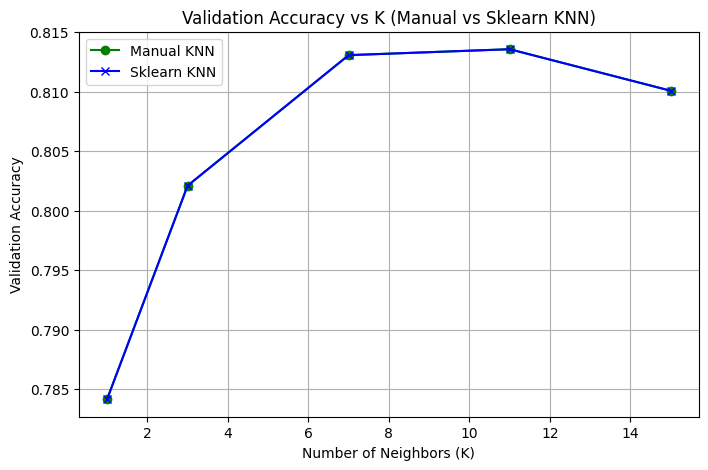

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(k_values, manual_accuracies, marker='o', color='green', label='Manual KNN')
plt.plot(k_values, sklearn_accuracies, marker='x', color='blue', label='Sklearn KNN')
plt.title("Validation Accuracy vs K (Manual vs Sklearn KNN)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

## Comparison between Scikit & Manual KNN

In [ ]:
print("\nClassification Report Comparison")
print("\nManual KNN:\n", classification_report(y_valid, y_pred_manual))
print("\nScikit-Learn KNN:\n", classification_report(y_valid, y_pred))


Classification Report Comparison

Manual KNN:
               precision    recall  f1-score   support

           0       0.87      0.73      0.79      1004
           1       0.77      0.89      0.82      1002

    accuracy                           0.81      2006
   macro avg       0.82      0.81      0.81      2006
weighted avg       0.82      0.81      0.81      2006


Scikit-Learn KNN:
               precision    recall  f1-score   support

           0       0.87      0.73      0.79      1004
           1       0.77      0.89      0.82      1002

    accuracy                           0.81      2006
   macro avg       0.82      0.81      0.81      2006
weighted avg       0.82      0.81      0.81      2006

Unique predictions: (array([0, 1]), array([ 845, 1161]))


- Both the manual KNN implementation and the Scikit-learn KNN model produced similar accuracy, precision, recall, and F1 scores for the same values of k.
- This indicates that the manual implementation correctly captures the KNN algorithm logic.